# Customer Segmentation Classification

## _Context (Use Case)_
An *automobile company* has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

In [238]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import Test & Train datasets

In [239]:
train_df = pd.read_csv(r"C:\Users\dhchaudhary\Desktop\MasterProject\Data_Science_Case_Studies\Train.csv")
test_df = pd.read_csv(r"C:\Users\dhchaudhary\Desktop\MasterProject\Data_Science_Case_Studies\Test.csv")

In [240]:
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [241]:
train_df.shape

(8068, 11)

In [242]:
test_df.shape

(2627, 10)

In [243]:
x = train_df.iloc[:, -1]
x.head()

0    D
1    A
2    B
3    B
4    A
Name: Segmentation, dtype: object

In [244]:
train_df.drop(['Segmentation'], axis=1, inplace=True)
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [245]:
f = pd.concat([train_df, test_df], axis =0)

In [169]:
f.shape

(10695, 10)

In [73]:
# test_df = pd.read_csv(r"C:\Users\dhchaudhary\Desktop\MasterProject\Data_Science_Case_Studies\Test.csv")
# test_df.head()

In [74]:
# test_df.shape

# Exploratory Data Analysis

In [246]:
tdf = test_df.copy()

### Numerical Feature

In [27]:
change_var = {"Segmentation":     {"A": 1, "B": 2, "C": 3, "D":4}}

In [28]:
df = df.replace(change_var)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,1
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,1


In [29]:
df.corr()

,ID,Age,Work_Experience,Family_Size,Segmentation
ID,1.000000,-0.005055,-0.030688,0.011801,-0.009104
Age,-0.005055,1.000000,-0.190789,-0.280517,-0.243552
Work_Experience,-0.030688,-0.190789,1.000000,-0.063234,0.012993
Family_Size,0.011801,-0.280517,-0.063234,1.000000,0.196213
Segmentation,-0.009104,-0.243552,0.012993,0.196213,1.000000


# Cleaning & Feature Engineering

## 1. Removing Nan Values

In [254]:
tdf.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

# ------------------------------------------------------------------------

In [178]:
col_lst = ['Var_1', 'Graduated', 'Profession', 'Ever_Married', 'Family_Size']

In [256]:
tdf['Ever_Married'].fillna(tdf['Ever_Married'].mode(), inplace = True)

In [255]:
tdf['Graduated'].mode()


0    Yes
dtype: object

In [252]:
# tdf.dropna(axis =0, subset=col_lst, how='any', inplace=True)

In [257]:
tdf.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [185]:
tdf.shape

(2384, 10)

In [186]:
tdf.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4


In [193]:
tdf['Work_Experience'].value_counts()

0.0     795
1.0     705
8.0     134
9.0     126
4.0      86
2.0      78
3.0      77
5.0      69
6.0      55
7.0      55
14.0     20
11.0     14
10.0     11
12.0     10
13.0     10
Name: Work_Experience, dtype: int64

In [190]:
# replace Nan of Work_exp with 0, if 'not Graduated'
def check_exp(col):
    Work_Experience = col[0]
    Graduated = col[1]
    
    if pd.isnull(Work_Experience):
        if Graduated == 'No':
            return 0
    else:
        return col[0]

In [194]:
tdf['Work_Experience'] = tdf[['Work_Experience', 'Graduated']].apply(check_exp, axis=1)

In [195]:
tdf.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    139
Spending_Score       0
Family_Size          0
Var_1                0
dtype: int64

In [200]:
tdf['Work_Experience'].value_counts()

0.0     795
1.0     705
8.0     134
9.0     126
4.0      86
2.0      78
3.0      77
5.0      69
6.0      55
7.0      55
14.0     20
11.0     14
10.0     11
12.0     10
13.0     10
Name: Work_Experience, dtype: int64

<AxesSubplot:>

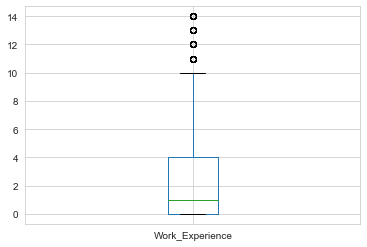

In [199]:
tdf.boxplot(column = ['Work_Experience'])

In [201]:
print (tdf.describe())

                  ID          Age  Work_Experience  Family_Size
count    2384.000000  2384.000000      2245.000000  2384.000000
mean   463441.474832    43.629614         2.448107     2.829698
std      2608.373846    16.919175         3.314824     1.556983
min    458989.000000    18.000000         0.000000     1.000000
25%    461217.250000    30.000000         0.000000     2.000000
50%    463399.500000    41.000000         1.000000     2.000000
75%    465655.750000    52.000000         4.000000     4.000000
max    467968.000000    89.000000        14.000000     9.000000


In [202]:
tdf['Work_Experience'].fillna(tdf['Work_Experience'].mean(), inplace = True)

In [203]:
tdf.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [204]:
tdf['Work_Experience'].value_counts()

0.000000     795
1.000000     705
2.448107     139
8.000000     134
9.000000     126
4.000000      86
2.000000      78
3.000000      77
5.000000      69
6.000000      55
7.000000      55
14.000000     20
11.000000     14
10.000000     11
12.000000     10
13.000000     10
Name: Work_Experience, dtype: int64

In [205]:
tdf.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,0.0,Low,4.0,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4


## 2. Handling Categorical Column

In [206]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2384 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2384 non-null   int64  
 1   Gender           2384 non-null   object 
 2   Ever_Married     2384 non-null   object 
 3   Age              2384 non-null   int64  
 4   Graduated        2384 non-null   object 
 5   Profession       2384 non-null   object 
 6   Work_Experience  2384 non-null   float64
 7   Spending_Score   2384 non-null   object 
 8   Family_Size      2384 non-null   float64
 9   Var_1            2384 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 204.9+ KB


In [207]:
tdf.Spending_Score.value_counts()

Low        1451
Average     575
High        358
Name: Spending_Score, dtype: int64

- Applying Label encoding on Spending score

In [208]:
change_var = {"Spending_Score":     {"Low": 1, "Average": 2, "High": 3}}

In [209]:
tdf = tdf.replace(change_var)
tdf.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,1,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,2,4.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,3,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,0.0,1,4.0,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0.0,3,5.0,Cat_4


In [272]:
tdf = pd.read_csv("final_test.csv")

In [273]:
tdf1 = tdf.iloc[:, 2:]

In [274]:
tdf1.shape

(2627, 9)

- Applying One-hot-encoding to rest of the Categorical column

In [275]:
Gender = pd.get_dummies(tdf1['Gender'], drop_first=True)
Ever_Married = pd.get_dummies(tdf1['Ever_Married'], drop_first=True)
Graduated = pd.get_dummies(tdf1['Graduated'], drop_first=True)
Profession = pd.get_dummies(tdf1['Profession'], drop_first=True)
Var_1 = pd.get_dummies(tdf1['Var_1'], drop_first=True)

In [276]:
tdf1.drop(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1'], axis=1, inplace=True)

In [277]:
tdf1.head()

,Age,Work_Experience,Spending_Score,Family_Size
0,36,0.0,Low,1.0
1,37,8.0,Average,4.0
2,69,0.0,Low,1.0
3,59,11.0,High,2.0
4,19,0.0,Low,4.0


In [278]:
tdf1 = pd.concat([tdf1, Gender, Ever_Married, Graduated, Profession, Var_1 ], axis =1)
tdf1.shape

(2627, 21)

In [279]:
pd.set_option('display.max_columns', None)

In [280]:
tdf1.head()

,Age,Work_Experience,Spending_Score,Family_Size,Male,Yes,Yes,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,36,0.0,Low,1.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,37,8.0,Average,4.0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,69,0.0,Low,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,59,11.0,High,2.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,19,0.0,Low,4.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [225]:
# tdf.drop(['ID'], axis=1, inplace=True)

### Converting 'float' values into 'int'

In [112]:
# df = df.astype(int)

In [281]:
tdf1.shape

(2627, 21)

In [219]:
# df1 = tdf.pop('Segmentation')
# tdf['Segmentation'] = df1

In [282]:
tdf1.columns

Index(['Age', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Male',
       'Yes', 'Yes', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
       'Healthcare', 'Homemaker', 'Lawyer', 'Marketing', 'Cat_2', 'Cat_3',
       'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7'],
      dtype='object')

In [284]:
tdf1.columns = ['Age', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Male',
       'Yes', 'Yes', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
       'Healthcare', 'Homemaker', 'Lawyer', 'Marketing', 'Cat_2', 'Cat_3',
       'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7']

In [285]:
tdf1.head()

,Age,Work_Experience,Spending_Score,Family_Size,Male,Yes,Yes,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,36,0.0,Low,1.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,37,8.0,Average,4.0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,69,0.0,Low,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,59,11.0,High,2.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,19,0.0,Low,4.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [286]:
tdf1['Work_Experience'] = tdf1['Work_Experience'].astype(int)

In [287]:
tdf1['Family_Size'] = tdf1['Family_Size'].astype(int)

In [120]:
# df.head()

In [232]:
# change_var = {"Segmentation":     {"A": 1, "B": 2, "C": 3, "D":4}}

In [233]:
# df = df.replace(change_var)
# df.head()

In [288]:
tdf1.head()

,Age,Work_Experience,Spending_Score,Family_Size,Male,Yes,Yes,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,36,0,Low,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,37,8,Average,4,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,69,0,Low,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,59,11,High,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,19,0,Low,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [289]:
change_var = {"Spending_Score":     {"Low": 1, "Average": 2, "High": 3}}

In [290]:
tdf1 = tdf1.replace(change_var)
tdf1.head()

,Age,Work_Experience,Spending_Score,Family_Size,Male,Yes,Yes,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,36,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,37,8,2,4,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,69,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,59,11,3,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,19,0,1,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [292]:
tdf1.shape

(2627, 21)

In [123]:
x = df.iloc[:, 0:-1]

In [124]:
y = df.iloc[:, -1]

In [125]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Logistic Reg

In [126]:
logreg = LogisticRegression()

In [127]:
logreg.fit(x_train, y_train)

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [128]:
prediction = logreg.predict(x_test)

In [134]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, r2_score, classification_report, recall_score, precision_score

In [130]:
print("Confusion matrix: \n", confusion_matrix(y_test, prediction))
print("Accuracy score:", accuracy_score(y_test, prediction))
print("Precision score:", precision_score(y_test, prediction, average='micro'))
print("Recall score:", recall_score(y_test, prediction, average='micro'))

Confusion matrix: 
 [[244  64 132  77]
 [150  92 234  66]
 [ 72  58 348  61]
 [138  31  59 387]]
Accuracy score: 0.4839584274740172
Precision score: 0.4839584274740172
Recall score: 0.4839584274740172


In [131]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.40      0.47      0.44       517
           2       0.38      0.17      0.23       542
           3       0.45      0.65      0.53       539
           4       0.65      0.63      0.64       615

    accuracy                           0.48      2213
   macro avg       0.47      0.48      0.46      2213
weighted avg       0.48      0.48      0.47      2213



## K-nearest Neighbour classifier

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
error_rate=[]
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

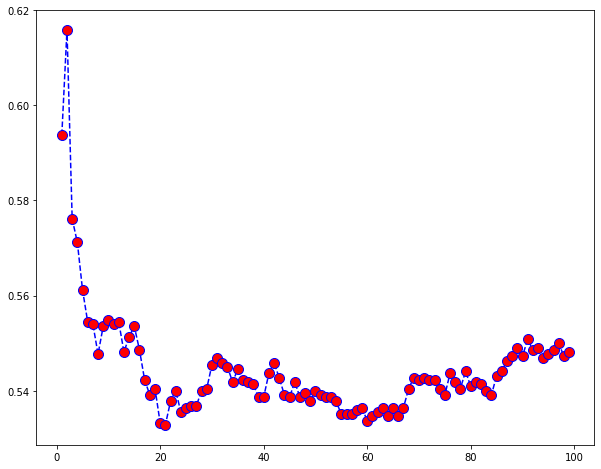

In [142]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 100), error_rate,color='blue',markerfacecolor='red', markersize=10, marker='o', linestyle='dashed' )

In [149]:
knn = KNeighborsClassifier(n_neighbors=21)

In [150]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [151]:
pred = knn.predict(x_test)

In [152]:
confusion_matrix(y_test, pred)

array([[196,  99, 124,  98],
       [128, 112, 237,  65],
       [ 63,  75, 337,  64],
       [119,  36,  71, 389]], dtype=int64)

In [153]:
print(accuracy_score(y_test, pred))

0.46723904202440125


In [154]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.39      0.38      0.38       517
           2       0.35      0.21      0.26       542
           3       0.44      0.63      0.52       539
           4       0.63      0.63      0.63       615

    accuracy                           0.47      2213
   macro avg       0.45      0.46      0.45      2213
weighted avg       0.46      0.47      0.45      2213



In [155]:
print("Precision score:", precision_score(y_test, pred, average='micro'))
print("Recall score:", recall_score(y_test, pred, average='micro'))

Precision score: 0.46723904202440125
Recall score: 0.46723904202440125


## Random forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
clf = RandomForestClassifier(max_depth=11, random_state=0)

In [129]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [130]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=11, random_state=0)

In [131]:
pred_randomclas = clf.predict(x_test)

In [135]:
confusion_matrix(y_test, pred_randomclas)

array([[255,  86,  70, 106],
       [141, 166, 167,  68],
       [ 72,  62, 336,  69],
       [115,  30,  24, 446]], dtype=int64)

In [136]:
print(accuracy_score(y_test, pred_randomclas))

0.543605964753728


In [137]:
print("Precision score:", precision_score(y_test, pred_randomclas, average='micro'))
print("Recall score:", recall_score(y_test, pred_randomclas, average='micro'))

Precision score: 0.543605964753728
Recall score: 0.543605964753728


In [293]:
finl = clf.predict(tdf1)

In [294]:
len(finl)

2627

In [298]:
test_df['ID'].shape

(2627,)

In [302]:
final_prediction = pd.DataFrame({
        "ID": test_df['ID'],
        "Segmentation": finl
    })

In [303]:
final_prediction.shape

(2627, 2)

In [304]:
final_prediction.to_csv('final.csv')

In [307]:
d = pd.read_csv("final.csv")
d.head()

,ID,Segmentation
0,458989,2
1,458994,3
2,458996,1
3,459000,3
4,459001,4


### Hyper-parameter optimization with Random forest

In [262]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [266]:
random_clf = RandomForestClassifier()

In [298]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [304]:
random_search = RandomizedSearchCV(estimator = random_clf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [305]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [306]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variabl

Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Time taken: 0 hours 2 minutes and 47.38 seconds.


In [307]:
random_search.best_estimator_

RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=1200)

In [308]:
random_clf = RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=1200)

In [309]:
random_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=1200)

In [310]:
random_pred = random_clf.predict(x_test)

In [2]:
print("Accuracy: ", accuracy_score(y_test, pred_randomclas))
print("Precision score: ", precision_score(y_test, pred_randomclas, average='micro'))
print("Recall score: ", recall_score(y_test, pred_randomclas, average='micro'))

NameError: name 'accuracy_score' is not defined

In [339]:
from sklearn.metrics import f1_score
f1_score(y_test, pred_randomclas, average=None)

array([0.46363636, 0.37471783, 0.5915493 , 0.68404908])

## Gradient Boosting Classifier

In [247]:
# import xgboost
# from sklearn.ensemble import xgboost

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

In [259]:
clf_gradient = GradientBoostingClassifier(learning_rate=1.0, max_depth=4, random_state=0).fit(x_train, y_train)

In [315]:
pprint(clf_gradient.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [260]:
pred_gradient = clf_gradient.predict(x_test)

In [261]:
print(accuracy_score(y_test, pred_gradient))

0.4771802982376864


### Parameter tuning for gradient boost

In [283]:
clf_gradient = GradientBoostingClassifier()

In [326]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [327]:
# params = {
#     "learning_rate" : [0.05, 0.01, 0.1, 0.23, 0.15, 0.4],
#     "max_depth"     : [3, 4, 5, 6, 8, 10, 12, 15, 17],
#     "gamma"   : [0.1, 0.2, 0.3, 0.4, 0.5],
#     "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
# }

In [328]:
random_search = RandomizedSearchCV(estimator = clf_gradient, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [329]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [330]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variabl

Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Time taken: 0 hours 0 minutes and 42.55 seconds.


In [332]:
random_search.best_estimator_

GradientBoostingClassifier(max_depth=16, max_features='sqrt',
                           min_samples_leaf=4, n_estimators=9)

In [335]:
clf_gradient = GradientBoostingClassifier(max_depth=16, max_features='sqrt',
                           min_samples_leaf=4, n_estimators=9)

In [336]:
clf_gradient.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=16, max_features='sqrt',
                           min_samples_leaf=4, n_estimators=9)

In [337]:
pred_gradient = clf_gradient.predict(x_test)

In [338]:
print("Accuracy: ", accuracy_score(y_test, pred_gradient))
print("Precision score: ", precision_score(y_test, pred_gradient, average='micro'))
print("Recall score: ", recall_score(y_test, pred_gradient, average='micro'))

Accuracy:  0.5250790781744239
Precision score:  0.5250790781744239
Recall score:  0.5250790781744239


## XGB Classifier

In [342]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from xgboost.sklearn import XGBClassifier

In [341]:
# !pip install xgboost

In [343]:
grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
kf = KFold(n_splits=2)

gs = GridSearchCV(estimator = XGBClassifier(n_estimators=500), param_grid = grid, scoring='accuracy',n_jobs=4, cv=kf)

In [345]:
gs.fit(x_train, y_train)

y_pred = gs.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 54.04%


In [352]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision score: ", precision_score(y_test, y_pred, average='micro'))
print("Recall score: ", recall_score(y_test, y_pred, average='micro'))

Accuracy:  0.5404428377767736
Precision score:  0.5404428377767736
Recall score:  0.5404428377767736


In [354]:
# pprint(gs.get_params())

In [347]:
gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [350]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=5,monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [353]:
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 54.04%
